
#  Credit card applications using supervised machine learning  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#preprocessing">Preprocessing the data </a></li>
<li><a href="#ML">Building a Machine Learning Model </a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report. Manually analyzing these applications is mundane, error-prone, and time-consuming. In this notebook, I will use supervised machine learning to build an automatic credit card approval predictor just like the real banks do. <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository is to used to build a machine learning model that can predict if an individual's application for a credit card will be accepted.

<a id='wrangling'></a>
## Data Wrangling (Asessing and Cleaning Data)

In [32]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

# Load dataset
df = pd.read_csv('cc_approvals.data', header=None)

# Inspect data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


Dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, since this data is confidential, the contributor of the dataset has anonymized the feature names. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus.

In [33]:
# changing colum names
columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
df.columns = columns

In [34]:
# cheking for typos 
df.nunique()

Gender              3
Age               350
Debt              215
Married             4
BankCustomer        4
EducationLevel     15
Ethnicity          10
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           171
Income            240
ApprovalStatus      2
dtype: int64

In [35]:
print(df.Gender.value_counts())
print('\n')
print(df.Married.value_counts())

b    468
a    210
?     12
Name: Gender, dtype: int64


u    519
y    163
?      6
l      2
Name: Married, dtype: int64


Data set contains alot of '?' marks

In [36]:
# Replace the '?'s with NaN
df = df.replace('?',np.nan)
df.nunique() #cheking 

Gender              2
Age               349
Debt              215
Married             3
BankCustomer        3
EducationLevel     14
Ethnicity           9
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
ApprovalStatus      2
dtype: int64

#### Dealing with NaNs in numeric columns 

In [40]:
df.isna().sum() # Counting Nans

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [41]:
# Impute the missing values with mean imputation
df.fillna(cc_apps.mean(numeric_only= True), inplace=True)

# Count the number of NaNs in the dataset to verify
df.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

#### Dealing with NaNs in non-numeric columns 

In [44]:
# Iterate over each column of df
for col in df.columns: 
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().idxmax())

# Count the number of NaNs in the dataset and print the counts to verify
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [45]:
# Checking for duplicate rows
df.duplicated().sum()

0

It is clear that data has no toataly duplicate rows

<a id='preprocessing'></a>
## Preprocessing the data 

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>

#### Converting non-numeric data into numeric ones

In [64]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns.to_numpy():
    # Compare if the dtype is object
    if df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

####  Splitting the dataset into train and test sets

In [108]:
# define features and target 
X = df.drop('ApprovalStatus', axis=1)
y = df[['ApprovalStatus']]

# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=.33,
                                random_state=42)

#### Rescaling all the values to the range of 0-1.

In [109]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

<a id='ML'></a>
## Building a Machine Learning Model 

In [110]:
# Import classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score, confusion_matrix

# Set seed for reproducibility
SEED = 1

#import pipline 
from sklearn.pipeline import make_pipeline

In [111]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
rf = RandomForestClassifier(random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt),
('Random Forest Classifier', rf)]

In [113]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(rescaledX_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(rescaledX_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test,y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-113-5dadaa50ee8a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(rescaledX_train, y_train)
<ipython-input-113-5dadaa50ee8a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(rescaledX_train, y_train)


Logistic Regression : 0.833
[[92 11]
 [27 98]]
K Nearest Neighbours : 0.855
[[ 89  14]
 [ 19 106]]
Classification Tree : 0.829
[[ 81  22]
 [ 17 108]]
Random Forest Classifier : 0.868
[[ 89  14]
 [ 16 109]]


#### Building a Tuned Random Forest Classifier Model 

Scikit-learn's implementation of Random Forest Classifier </a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>n_estimators</li>
<li>min_samples_leaf</li>
</ul>

In [188]:
from sklearn.model_selection import RandomizedSearchCV

# Define a grid of hyperparameter 'param_grid'
param_grid = {'n_estimators':[200,300],
              'min_samples_leaf':np.arange(1,3)}

# Instantiate 'grid_rf'
grid_rf = RandomizedSearchCV(rf,
param_grid,
cv=5)

# Fit 'grid_rf' to the training set
grid_rf.fit(rescaledX_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'min_samples_leaf': array([1, 2]),
                                        'n_estimators': [200, 300]})

In [189]:
# Extract best hyperparameters and score
best_score, best_params = grid_rf.best_score_ ,grid_rf.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model from grid_rf
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(rescaledX_test)

# Evaluate the accuracy of grid_rf  on the test set
test_acc = best_model.score(rescaledX_test, y_test)

print("Test set accuracy of best model: {:.3f}".format(test_acc))
print(confusion_matrix(y_test,y_pred))

Best: 0.876554 using {'n_estimators': 200, 'min_samples_leaf': 1}
Test set accuracy of best model: 0.873
[[ 90  13]
 [ 16 109]]


#### Plotting the top important features

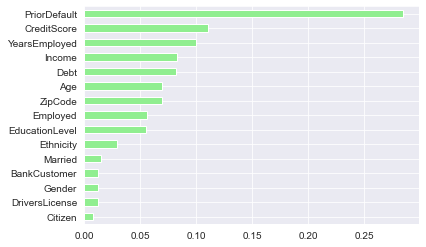

In [191]:
# Create a pd.Series of features importances
importances_best_model = pd.Series(best_model.feature_importances_, index = X.columns)
# Sort importances_best_model
sorted_importances_best_model = importances_best_model.sort_values()
# Make a horizontal bar plot
sorted_importances_best_model.plot(kind='barh', color='lightgreen'); plt.show()

# Conclusions 

<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person. the best model was Random Forest Classifier and the top important features were PrioeDefault, CreditScore and YearsEmployed.